In [2]:
!python --version

Python 3.10.12


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
heart_dataset = pd.read_csv("/content/drive/MyDrive/heart_data.csv")
heart_dataset.head(5)

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [6]:
# number of rows and columns in the dataset
heart_dataset.shape

(297, 14)

In [7]:
# getting some information about the data
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    int64  
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    int64  
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    int64  
 7   gender           297 non-null    int64  
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
# checking for missing values
heart_dataset.isnull().sum()

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
st_depression      0
rest_ecg           0
num_vessels        0
diagnosis          0
dtype: int64

In [9]:
# checking the distribution of Target Varibale
heart_dataset['diagnosis'].value_counts()

0    160
1    137
Name: diagnosis, dtype: int64

In [10]:
X = heart_dataset.drop(columns='diagnosis', axis=1)
Y = heart_dataset['diagnosis']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [12]:
# importing tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [13]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(13,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# training the Neural Network
training_his = model.fit(X_train, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
6/6 [==============================] - 2s 50ms/step - loss: 4.6168 - accuracy: 0.5215 - val_loss: 4.1877 - val_accuracy: 0.4762
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 3.6781 - accuracy: 0.5108 - val_loss: 4.1839 - val_accuracy: 0.4762
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 3.4023 - accuracy: 0.5376 - val_loss: 3.4546 - val_accuracy: 0.6190
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 3.0642 - accuracy: 0.5376 - val_loss: 3.0262 - val_accuracy: 0.6190
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 2.7247 - accuracy: 0.5215 - val_loss: 2.9541 - val_accuracy: 0.4762
Epoch 6/20
6/6 [==============================] - 0s 11ms/step - loss: 2.3661 - accuracy: 0.5215 - val_loss: 2.3035 - val_accuracy: 0.5714
Epoch 7/20
6/6 [==============================] - 0s 8ms/step - loss: 2.0714 - accuracy: 0.5376 - val_loss: 2.0607 - val_accuracy: 0.5238
Epoch 8/20
6/6 [================

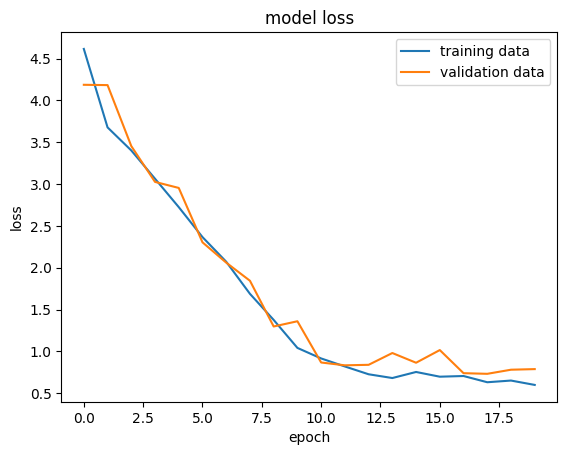

In [14]:
plt.plot(training_his.history['loss'])
plt.plot(training_his.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'])

In [15]:
Y_pred = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [16]:
# Picking the diagnosis with the highest weight
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]


In [17]:
input_data = (113, 3, 2, 69, 0, 150, 1, 1, 1, 225, 1.5, 2, 2)
# change the input_data to a numpy array
input_data= np.asarray(input_data)
input_data = input_data.reshape(1,-1)

prediction = model.predict(input_data)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('No heart disease')
else:
  print('Heart disease detected')

1/1 [==============================] - 0s 59ms/step
[[0.9559349 0.9727999]]
[1]
Heart disease detected


In [18]:
model.save('heart_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
new_model = keras.models.load_model('heart_model.h5')

In [20]:
prediction = new_model.predict(input_data)
print(prediction)

1/1 [==============================] - 0s 61ms/step
[[0.9559349 0.9727999]]
